In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
import numpy as np

In [31]:
df = pd.read_csv('data/processed_data/coverage_data_processed.csv')

In [32]:
# get the log for later - to see if we can adjust for heteroscedasticity
df['log_total_cover'] = np.log(df['total_cover'])

In [33]:
print(f"total cover mean: {df['total_cover'].mean()}")
print(f"total cover median: {df['total_cover'].median()}")
print(f"moss cover mean: {df['moss_cover'].mean()}")
print(f"moss cover median: {df['moss_cover'].median()}")
print(f"lichen cover mean: {df['lichen_cover'].mean()}")
print(f"lichen cover median: {df['lichen_cover'].median()}")



total cover mean: 0.2819354838709677
total cover median: 0.23
moss cover mean: 0.06494193548387095
moss cover median: 0.0343
lichen cover mean: 0.21699354838709675
lichen cover median: 0.1541


<Axes: xlabel='total_cover', ylabel='Count'>

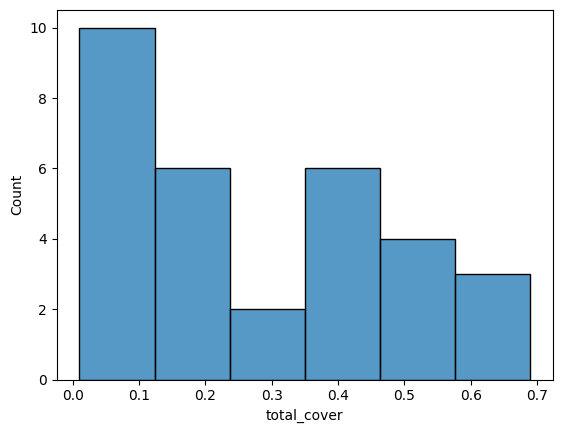

In [34]:
sns.histplot(df['total_cover'])

<Axes: xlabel='moss_cover', ylabel='Count'>

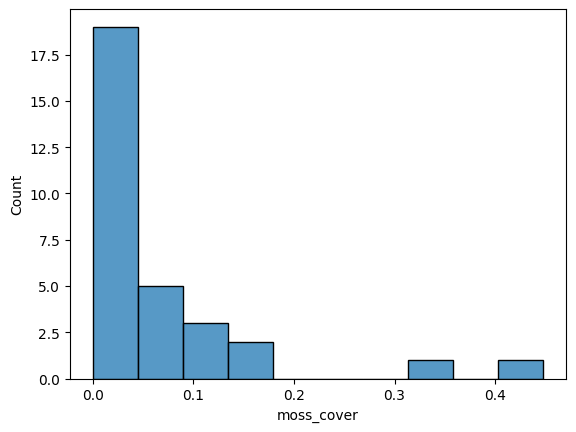

In [35]:
sns.histplot(df['moss_cover'])

<Axes: xlabel='deviation_north', ylabel='Count'>

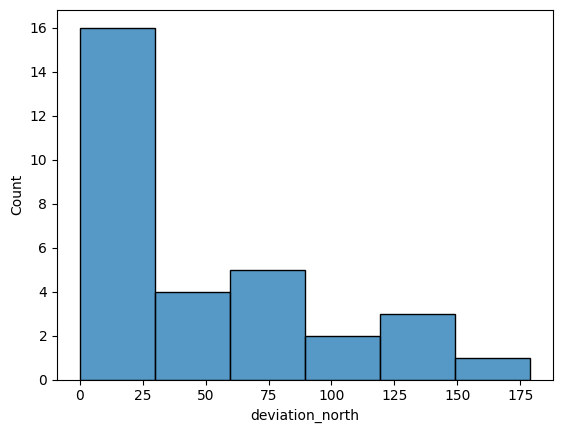

In [36]:
sns.histplot(df['deviation_north'])

<Axes: xlabel='deviation_north', ylabel='total_cover'>

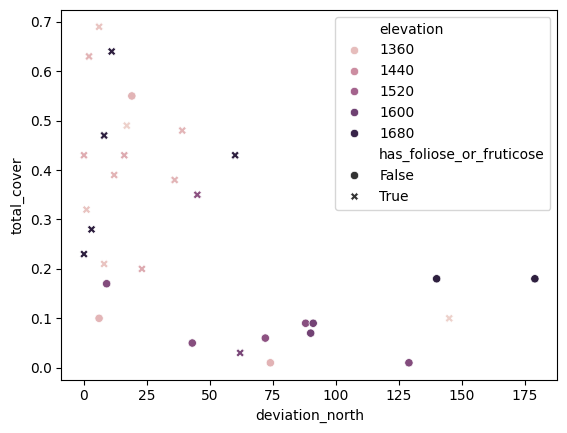

In [37]:
sns.scatterplot(df, x='deviation_north', y='total_cover', style='has_foliose_or_fruticose', hue='elevation')


<Axes: xlabel='deviation_north', ylabel='moss_cover'>

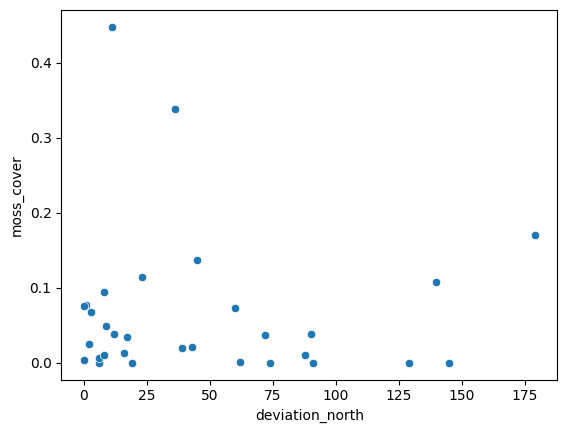

In [38]:
sns.scatterplot(x=df['deviation_north'], y=df['moss_cover'])


<Axes: xlabel='deviation_north', ylabel='lichen_cover'>

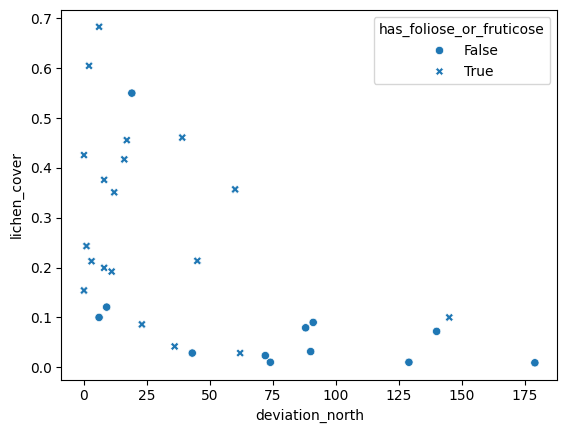

In [39]:
sns.scatterplot(df, x='deviation_north', y='lichen_cover', style='has_foliose_or_fruticose')


<Axes: xlabel='solar_radiation', ylabel='total_cover'>

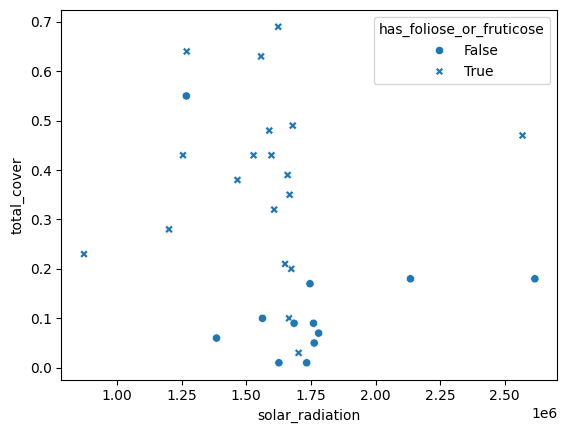

In [40]:
sns.scatterplot(df, x='solar_radiation', y='total_cover', style='has_foliose_or_fruticose')

<Axes: xlabel='solar_radiation', ylabel='Count'>

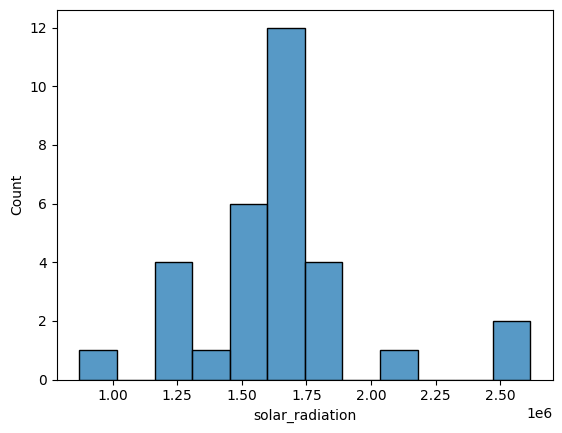

In [68]:
sns.histplot(df['solar_radiation'])

<Axes: xlabel='elevation', ylabel='total_cover'>

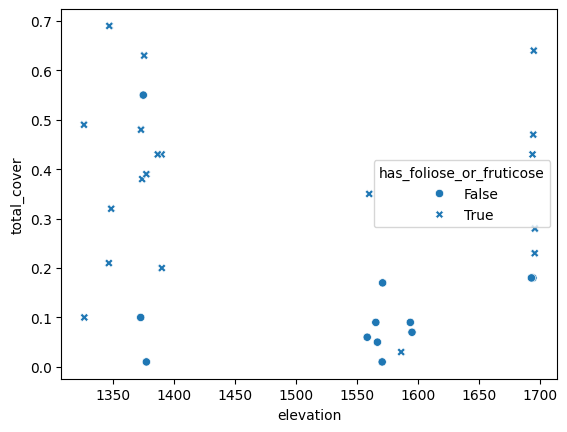

In [41]:
sns.scatterplot(df, x='elevation', y='total_cover', style='has_foliose_or_fruticose')

In [42]:
# I wanna look at data from each lichen species
# get all the columns that have species in them

has_species_columns = ['has_W_f', 'has_GR_c', 'has_Bl_f', 'has_R_c', 'has_Bl_c', 'has_W_fr',
    'has_O_c', 'has_W_c', 'has_Y_f', 'has_G_c']


In [43]:
# get data about the counts of all the species
species_counts = {
        column: df[column].sum() for column in has_species_columns
    }
print(species_counts)


{'has_W_f': np.int64(14), 'has_GR_c': np.int64(7), 'has_Bl_f': np.int64(5), 'has_R_c': np.int64(2), 'has_Bl_c': np.int64(8), 'has_W_fr': np.int64(8), 'has_O_c': np.int64(14), 'has_W_c': np.int64(31), 'has_Y_f': np.int64(1), 'has_G_c': np.int64(29)}


<Axes: >

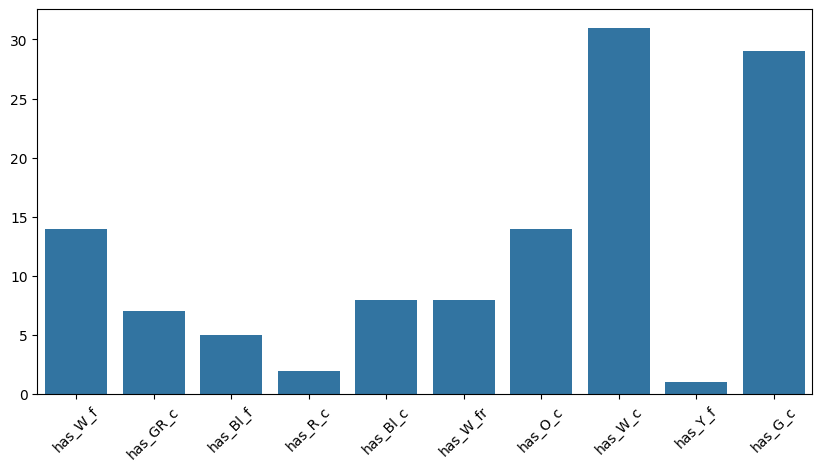

In [44]:
plt.figure(figsize=(10, 5)) 
plt.xticks(rotation=45)
sns.barplot(species_counts)

In [69]:
# variables that I want to run statistical analysis on
vars_of_interest = ['deviation_north', 'solar_radiation', 'elevation',
                    'total_nitrogen', 'nh4', 'po4']

In [70]:
# run spearman's rank on the variables of interest, x = variable, y = total cover
for variable in vars_of_interest:
    corr, pval = spearmanr(df[variable], df['total_cover'])
    print(f'{variable} and total cover spearmanr values')
    print(f'correlation: {corr}')
    print(f'p value: {pval}')

deviation_north and total cover spearmanr values
correlation: -0.5729135859035996
p value: 0.0007558056759252292
solar_radiation and total cover spearmanr values
correlation: -0.4441082963845744
p value: 0.012320673504957198
elevation and total cover spearmanr values
correlation: -0.21287335424158382
p value: 0.2502425544142417
total_nitrogen and total cover spearmanr values
correlation: 0.1869008210486994
p value: 0.31404852645382625
nh4 and total cover spearmanr values
correlation: -0.06064582342622371
p value: 0.7458743069202618
po4 and total cover spearmanr values
correlation: -0.09030163823720863
p value: 0.6290204807526425


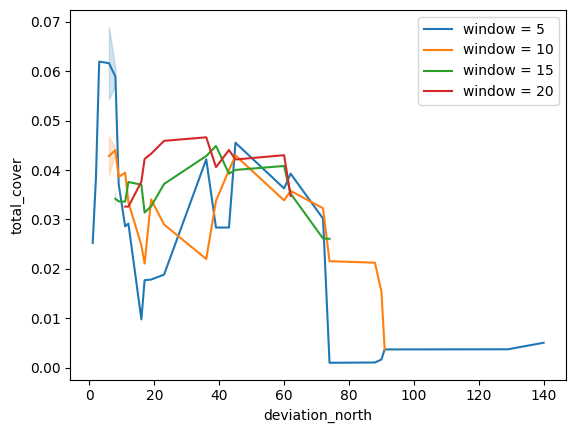

In [47]:
# plotting the variance across aspect deviation from north and total coverage
# get a df where all values for similar deviation_north are near each other
df_by_deviation_north = df.sort_values('deviation_north')
# check how much variance there is for total cover around each
# value of deviation north to see how much the variance itself varies across
# the dataset (= how heteroscedastic the data is)
variance_windows = [5, 10, 15, 20]
# basically: at each "deviation north" value, this checks for the
# 5, 10, 15, or 20 nearest values of corresponding "total cover",
# calculating the variance of these n nearest values. So the graph
# represents various ways to show how much the variance changes across
# the relationship between total cover and aspect deviation from north
for variance_window in variance_windows:
    rol_var = df_by_deviation_north['total_cover'].rolling(
        window=variance_window, center=True
    ).var()
    sns.lineplot(
        df_by_deviation_north, x='deviation_north', y=rol_var,
        label=f'window = {variance_window}'
    )




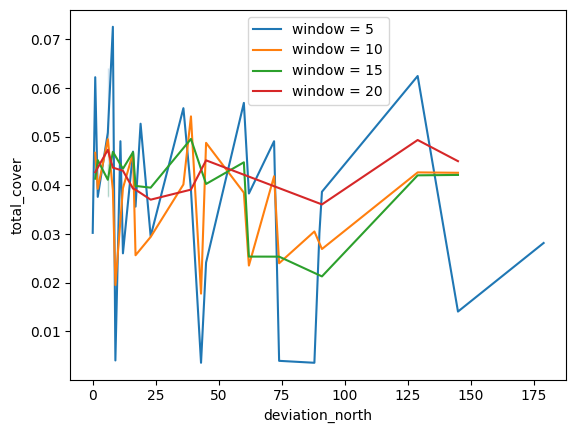

In [48]:
# let's do the same with solar radiation
df_by_solar_radiation = df.sort_values('solar_radiation')

for variance_window in variance_windows:
    rol_var = df_by_solar_radiation['total_cover'].rolling(
        window=variance_window, center=True
    ).var()
    sns.lineplot(
        df_by_solar_radiation, x='deviation_north', y=rol_var,
        label=f'window = {variance_window}'
    )


<Axes: xlabel='deviation_north', ylabel='log_total_cover'>

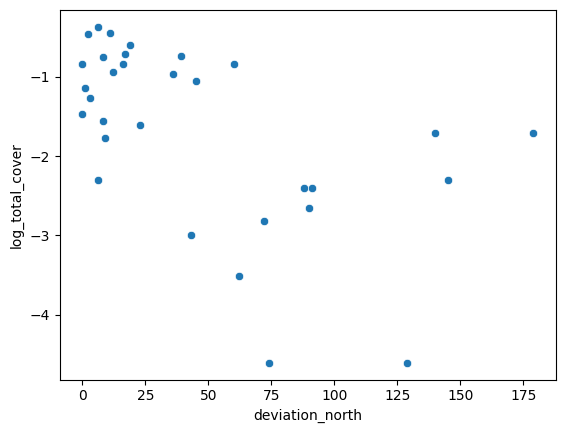

In [49]:
sns.scatterplot(df, x='deviation_north', y='log_total_cover')

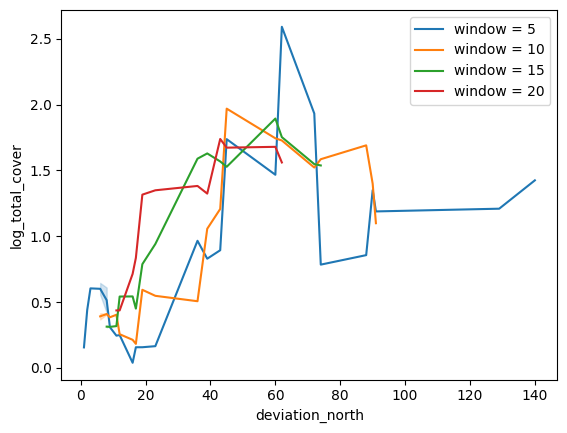

In [50]:
for variance_window in variance_windows:
    rol_var = df_by_deviation_north['log_total_cover'].rolling(
        window=variance_window, center=True
    ).var()
    sns.lineplot(
        df_by_deviation_north, x='deviation_north', y=rol_var,
        label=f'window = {variance_window}'
    )

In [51]:
# numerically check the difference in variance at certain thresholds
from scipy.stats import levene

levene_thresholds = [15, 30, 45, 60]
for threshold in levene_thresholds:
    group1 = df[df['deviation_north'] < threshold]['total_cover']
    group2 = df[df['deviation_north'] >= threshold]['total_cover']
    stat, pval = levene(group1, group2)
    print(f'''how significant is the difference in variance below and above {threshold}
          degrees away from north for total coverage''')
    print(f'f statistic : {stat}')
    print(f'p value: {pval}')

how significant is the difference in variance below and above 15
          degrees away from north for total coverage
f statistic : 0.01578692962799525
p value: 0.9008791311236795
how significant is the difference in variance below and above 30
          degrees away from north for total coverage
f statistic : 0.6508511756214365
p value: 0.42637566781732883
how significant is the difference in variance below and above 45
          degrees away from north for total coverage
f statistic : 2.682762976105708
p value: 0.11224628125991698
how significant is the difference in variance below and above 60
          degrees away from north for total coverage
f statistic : 3.7620800408372337
p value: 0.062209869695222304


In [52]:
# let's run a levene test at each "deviation north" value to see how much
# the variance significantly differs at each point

for index, row in df_by_deviation_north.iterrows():
    threshold = row['deviation_north']
    group1 = df[df['deviation_north'] < threshold]['total_cover']
    group2 = df[df['deviation_north'] >= threshold]['total_cover']
    stat, pval = levene(group1, group2)
    df_by_deviation_north.loc[index, 'aspect_levene_pval'] = pval
    df_by_deviation_north.loc[index, 'aspect_levene_fstat'] = stat




/var/folders/25/82ztpk21087b258r7gs0n3m00000gn/T/ipykernel_85623/638447618.py:8: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, pval = levene(group1, group2)
/var/folders/25/82ztpk21087b258r7gs0n3m00000gn/T/ipykernel_85623/638447618.py:8: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, pval = levene(group1, group2)


<Axes: xlabel='deviation_north', ylabel='aspect_levene_fstat'>

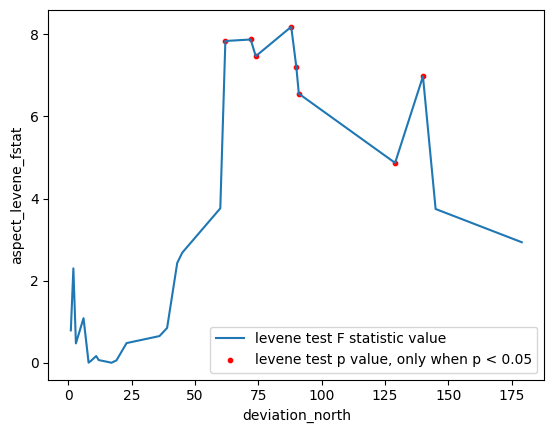

In [ ]:
# now we're plotting the levene values. Very high levene values means
# that at that threshold for "deviation_north", there is a very high difference
# in variance above and below the threshold.
sns.lineplot(
    df_by_deviation_north, x='deviation_north', 
    y='aspect_levene_fstat',
    label=f'levene test F statistic value'
)
sig = df_by_deviation_north['aspect_levene_pval'] < 0.05

# we'll add red dots on our line to show where the levene values are also
# statistically significant.
sns.scatterplot(
    df_by_deviation_north[sig],
    x='deviation_north', y='aspect_levene_fstat',
    color='red', s=20,
    label='levene test p value, only when p < 0.05'
)

The levene graph shows that levene values are very high for thresholds in the middle of hte graph, with continuous high p-values. We can conclude that the values on both end of the relationship have very different variance.

<Axes: xlabel='total_nitrogen', ylabel='Count'>

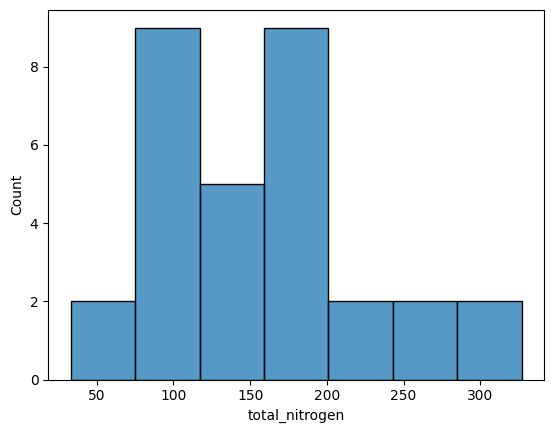

In [60]:
# let's look at the nutrients now
sns.histplot(data=df['total_nitrogen'])

<Axes: xlabel='total_nitrogen', ylabel='total_cover'>

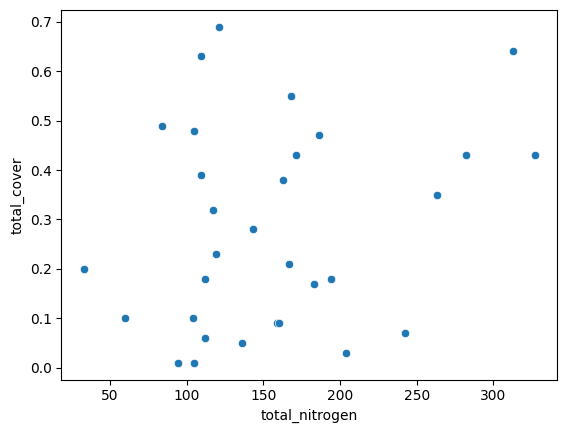

In [62]:
sns.scatterplot(df, x='total_nitrogen', y='total_cover')

<Axes: xlabel='nh4', ylabel='total_cover'>

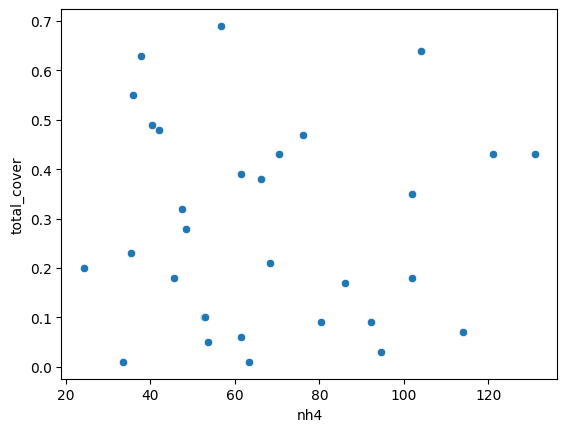

In [63]:
sns.scatterplot(df, x='nh4', y='total_cover')

<Axes: xlabel='po4', ylabel='total_cover'>

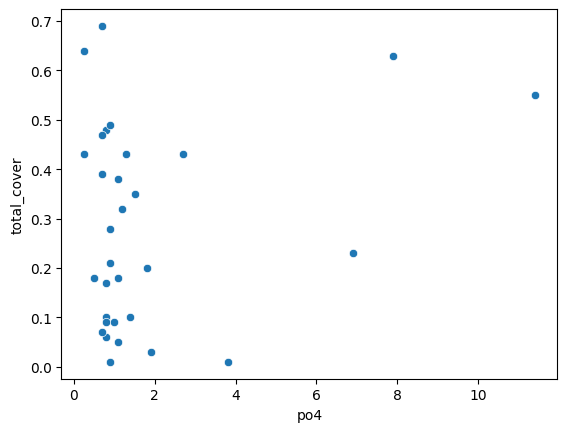

In [64]:
sns.scatterplot(df, x='po4', y='total_cover')

What to conclude from this?

1. Nutrients don't seem to play a role in moss coverage of the surfaces we measured.
2. The relationship between aspect and coverage exists, but it is non-linear, variance is much higher at north-facing aspects (shielded from the sun), values are low at south-facing aspects. P value is very high both for the relationship, and for the differences in variance across the relationship.
3. Solar radiation may matter. P value is low but we have very little data, most of our data is within similar solar radiation values.
4. Elevation is interesting - it seems there's no clear linear relationship. However, at one elevation we see persistently lower cover. Our data is also confined to a few specific elevations, it would be interesting to collect data for a whole spectrum of elevations and see if any relationship emerges. Additionally, elevation seems to make a difference for the types of species we see.
5. Most of our samples are north-facing due to a flaw in our methodology. We lack data from south-facing slopes.

So what's next?

1. We can't run linear regressions on the relationships we find most relevant because the relationships are not linear. We need different methods.
2. Revise the methodology to collect more samples at various elevations, and at random aspects. 
3. Drop nutrient analysis as a part of the study, it seems of low relevance and there is a theoretical explanation why (lichens get their nutrients from the air).
4. Focus on why there is so much variation at north-facing slopes?